In [402]:
import numpy as np
import pandas as pd
%matplotlib inline
import os

In [403]:
columns = ('appId', 'name')
df_games_names = pd.concat([pd.read_csv('page{}_games.csv'.format(i), usecols=[1, 2], names=columns) for i in range(1, 6)])

df_games_names

,appId,name
0,271590,Grand Theft Auto V
1,1174180,Red Dead Redemption 2
2,1145360,Hades
3,715950,Divinity: Original Sin 2
4,391540,Undertale
...,...,...
11,1237970,Titanfall 2
12,584400,Sonic Mania
13,268500,XCOM 2
14,412830,STEINS;GATE


In [404]:
columns = ('appId', 'user', 'rating', 'hours')
df_reviews = pd.concat([pd.read_csv('page{}_reviews.csv'.format(i), usecols=[0, 3, 6, 7], names=columns) for i in range(1, 6)], ignore_index=True)
df_reviews

,appId,user,rating,hours
0,1145360,76561198059680994,1,48.3
1,1145360,lalaso123,1,23.2
2,1145360,76561198008088676,1,5.1
3,1145360,YogurtRed,1,11.4
4,1145360,76561199095470163,1,22.8
...,...,...,...,...
976869,809230,7.65612E+16,1,41.6
976870,809230,7.65612E+16,1,63.6
976871,809230,7.65612E+16,1,19.1
976872,809230,7.65612E+16,1,136.6


In [405]:
df_sentiments = pd.read_csv('sentiment.csv', names=['appId', 'user','sentiment'])
df_sentiments

,appId,user,sentiment
0,1145360,7.66E+16,0.4927
1,1145360,lalaso123,0.7857
2,1145360,7.66E+16,0.9799
3,1145360,YogurtRed,0.5563
4,1145360,7.66E+16,0.9236
...,...,...,...
976869,809230,7.66E+16,0.5267
976870,809230,7.66E+16,-0.5423
976871,809230,7.66E+16,0.0000
976872,809230,7.66E+16,0.4118


In [406]:
df_reviews['sentiment'] = df_sentiments['sentiment']
df_reviews

,appId,user,rating,hours,sentiment
0,1145360,76561198059680994,1,48.3,0.4927
1,1145360,lalaso123,1,23.2,0.7857
2,1145360,76561198008088676,1,5.1,0.9799
3,1145360,YogurtRed,1,11.4,0.5563
4,1145360,76561199095470163,1,22.8,0.9236
...,...,...,...,...,...
976869,809230,7.65612E+16,1,41.6,0.5267
976870,809230,7.65612E+16,1,63.6,-0.5423
976871,809230,7.65612E+16,1,19.1,0.0000
976872,809230,7.65612E+16,1,136.6,0.4118


In [407]:
indexNames = df_reviews[df_reviews['user'] == '#NAME?' ].index
df_reviews.drop(indexNames , inplace=True)
df_unique_reivews = df_reviews.drop_duplicates(subset=['appId', 'user'])
df_unique_reivews.shape

(877415, 5)

In [408]:
df_unique_reivews

,appId,user,rating,hours,sentiment
0,1145360,76561198059680994,1,48.3,0.4927
1,1145360,lalaso123,1,23.2,0.7857
2,1145360,76561198008088676,1,5.1,0.9799
3,1145360,YogurtRed,1,11.4,0.5563
4,1145360,76561199095470163,1,22.8,0.9236
...,...,...,...,...,...
976834,809230,bhollowa123,1,393.7,0.9290
976840,809230,MessedUpHare,1,3.4,-0.0237
976842,809230,milkmouf,-1,0.9,-0.1027
976843,809230,Octavian1453,1,125.4,0.9879


In [409]:
g = df_unique_reivews.groupby('user').agg('count')
df_unique_reivews = df_unique_reivews[df_unique_reivews['user'].isin(g[g['rating'] > 1].index)]

In [410]:
g[g['rating'] > 1]

,appId,rating,hours,sentiment
user,,,,
----Werewolf---,3,3,3,3
--Legion--,2,2,2,2
--SaiyajiN,2,2,2,2
--Ulrich--,2,2,2,2
--depresso--,2,2,2,2
...,...,...,...,...
zzzwhiteboyzzz,2,2,2,2
zzzxggg,2,2,2,2
zzzzzzzzzx_x,3,3,3,3


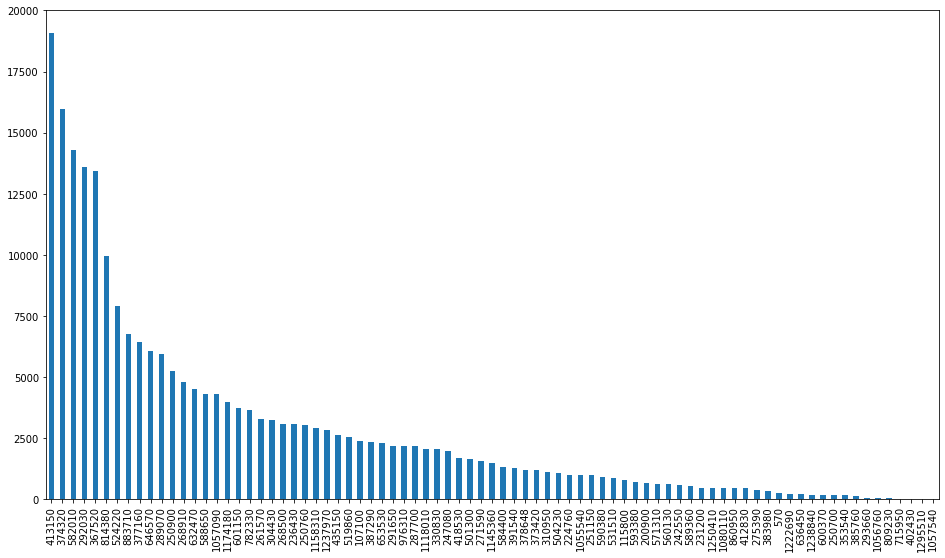

In [411]:
df_unique_reivews.appId.value_counts().plot(kind='bar', figsize=(16,9))

In [412]:
df_unique_reivews.appId.value_counts().describe()

count       81.000000
mean      2813.320988
std       3821.009339
min         21.000000
25%        468.000000
50%       1492.000000
75%       3252.000000
max      19061.000000
Name: appId, dtype: float64

In [413]:
df_games_users = df_unique_reivews.pivot(
    index='appId',
    columns='user',
    values='sentiment'
).fillna(0)

df_games_users

user,----Werewolf---,--Legion--,--SaiyajiN,--Ulrich--,--depresso--,--infinite,-5k,-76561198091459618-,-Azsael-,-B-l-a-n-k-,-BJORGVIK-,-Caboose-,-Chanel-,-D-A-V-O-,-D14b0lIc5a1b0tD47k9t0p1ak54n-,-DampLamp-,-DeepDarkFantasy-,-Django-,-Fanta,-Godspeed-,-GwynBleidd,-ImGerik-,-JZ-,-Kelthor-,-Kubix,-Kyperstar-,-LegendarySlayer,-Meechy-,-Nerd,-Quarrel-,-Quinton-,-S-n-a-k-e-B-e-a-t-e-r-,-Somsok-,-T-,-Unknown21-,-Wei-,-_-lovely-_-,-_GOLD_-,-aquafina,-bye-,...,zweistein_Jimmy,zwenkel,zwheel94,zwienzixes,zwoop,zx111,zxSh1ny,zxmost,zxund,zxya,zxzc77,zycietocalareszta,zydoe,zydrateacademy,zygrot24,zylentis,zymes,zymlaibaklazan,zynen,zynetic,zynthetik,zynx66,zyondlafon,zyphir77,zypix,zyrareflex,zyrkan,zyrongames,zyrums,zyxwv2,zyzamo,zzayn,zzfuzzy,zzzeli,zzzkentucky,zzzwhiteboyzzz,zzzxggg,zzzzzzzzzx_x,zzzzzzzzzzz111,zzzzzzzzzzzzzzzzzzz12
appId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
570,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107100,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.7346,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.4215,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115800,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200900,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
224760,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.7479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222690,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1237970,0.0,0.0,0.0,0.0,0.4404,0.0,-0.4131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.7964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.6705,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5562,0.0,0.3818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1238840,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5667,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.

In [414]:
hashmap = {appId: i for i, appId in enumerate(list(df_games_users.index))}
hashmap

{570: 0,
 107100: 1,
 115800: 2,
 200900: 3,
 224760: 4,
 231200: 5,
 236430: 6,
 242550: 7,
 247080: 8,
 250700: 9,
 250760: 10,
 250900: 11,
 251150: 12,
 261570: 13,
 268500: 14,
 268910: 15,
 271590: 16,
 275390: 17,
 287700: 18,
 289070: 19,
 291650: 20,
 292030: 21,
 293660: 22,
 304430: 23,
 310950: 24,
 330830: 25,
 353540: 26,
 367520: 27,
 373420: 28,
 374320: 29,
 377160: 30,
 378648: 31,
 383980: 32,
 385760: 33,
 387290: 34,
 391540: 35,
 402430: 36,
 412830: 37,
 413150: 38,
 418530: 39,
 435150: 40,
 501300: 41,
 504230: 42,
 519860: 43,
 524220: 44,
 531510: 45,
 560130: 46,
 571310: 47,
 582010: 48,
 584400: 49,
 588650: 50,
 589360: 51,
 590380: 52,
 593380: 53,
 600370: 54,
 601150: 55,
 632470: 56,
 636450: 57,
 646570: 58,
 653530: 59,
 715950: 60,
 782330: 61,
 809230: 62,
 814380: 63,
 860950: 64,
 883710: 65,
 976310: 66,
 1055540: 67,
 1056760: 68,
 1057090: 69,
 1057540: 70,
 1080110: 71,
 1118010: 72,
 1145360: 73,
 1158310: 74,
 1174180: 75,
 1222690: 76,
 1

In [415]:
df_games_users.values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [416]:
from scipy.sparse import csr_matrix

sparse_mat_games_users = csr_matrix(df_games_users.values)

In [417]:
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)

model.fit(sparse_mat_games_users)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                 radius=1.0)

In [418]:
distances, indices = model.kneighbors(
            sparse_mat_games_users[hashmap[271590]],
            n_neighbors=10+1)

In [419]:
indices

array([[16, 75, 21, 71, 18, 30, 38, 19, 11, 77, 65]])

In [420]:
raw_recommends = \
            sorted(
                list(
                    zip(
                        indices.squeeze().tolist(),
                        distances.squeeze().tolist()
                    )
                ),
                key=lambda x: x[1]
            )[1:]

In [421]:
raw_recommends

[(75, 0.9587577653672757),
 (21, 0.97336259180372),
 (71, 0.9841834997839852),
 (18, 0.9842728992053601),
 (30, 0.9852671553506099),
 (38, 0.9857009086187757),
 (19, 0.9895110923703947),
 (11, 0.989553620638414),
 (77, 0.9898716405703376),
 (65, 0.9901668153428526)]

In [422]:
reverse_hashmap = {v: k for k, v in hashmap.items()}
print('Recommendations for {}:'.format(271590))
for i, (idx, dist) in enumerate(raw_recommends):
    print('{}: {}, distance of {}'.format(i+1, df_games_names[df_games_names['appId'] == reverse_hashmap[idx]].iloc[0].at['name'], dist))
#     print('{}: {}, distance of {}'.format(i+1, reverse_hashmap[idx], dist))

Recommendations for 271590:
1: Red Dead Redemption 2, distance of 0.9587577653672757
2: The Witcher 3: Wild Hunt, distance of 0.97336259180372
3: F1 2020, distance of 0.9841834997839852
4: Metal Gear Solid V: The Phantom Pain, distance of 0.9842728992053601
5: Fallout 4, distance of 0.9852671553506099
6: Stardew Valley, distance of 0.9857009086187757
7: Sid Meier’s Civilization® VI, distance of 0.9895110923703947
8: The_Binding_of_Isaac_Rebirth, distance of 0.989553620638414
9: Titanfall 2, distance of 0.9898716405703376
10: Resident Evil 2, distance of 0.9901668153428526


In [423]:
def  get_review_pn_len(input_review, name):
    g_game_count = input_review.groupby('appId').agg('count')
    g_game_sum = input_review.groupby('appId').agg('sum')
    negative_num = g_game_count - g_game_sum

    negative_num = negative_num / 2
    negative_num.rename(columns = {'rating': 'negative'}, inplace =True)
    negative_num = negative_num['negative']

    positive_num = g_game_count - (g_game_count - g_game_sum)/2
    positive_num.rename(columns = {'rating': 'positive'}, inplace =True)
    positive_num = positive_num['positive']

    review_pn_len = pd.concat([positive_num, negative_num],axis=1, join='inner') 

    review_pn_len['total num'] = review_pn_len['negative'] + review_pn_len['positive']

    name_list = []
    for i in node_data.index:
        name_list.append(name[name['appId'] == i].iloc[0].at['name'])

    review_pn_len['name'] = name_list
    review_pn_len = review_pn_len.sort_values(by='total num',ascending=True)
    
    return review_pn_len

In [424]:
node_data = get_review_pn_len(df_unique_reivews, df_games_names)
node_data

,positive,negative,total num,name
appId,,,,
1295510,19.0,2.0,21.0,Stardew Valley
1057540,19.0,2.0,21.0,Sid Meier’s Civilization® VI
402430,21.0,3.0,24.0,Divinity: Original Sin Enhanced Edition
715950,32.0,0.0,32.0,INSIDE
809230,28.0,9.0,37.0,DOOM Eternal
...,...,...,...,...
367520,12914.0,517.0,13431.0,XCOM 2: War of the Chosen
292030,13143.0,448.0,13591.0,Kentucky_Route_Zero_PC_Edition
582010,12829.0,1459.0,14288.0,Mortal_Kombat11


In [425]:
import matplotlib.pylab as plt

def figure_type1(node_data):
    plt.figure(figsize=(40, 16))
    plt.scatter(node_data['name'], 
                node_data['positive']/node_data['total num'], 
                alpha=0.7, 
                s=node_data['total num']/3, # marker size
                #c=range(len(node_data)), # marker color
                c=node_data['positive']/node_data['total num'],
                cmap='viridis')

    plt.xlabel('index')
    plt.xticks(rotation = 90)
    plt.ylabel('positive rate')
    plt.colorbar()
    plt.show()



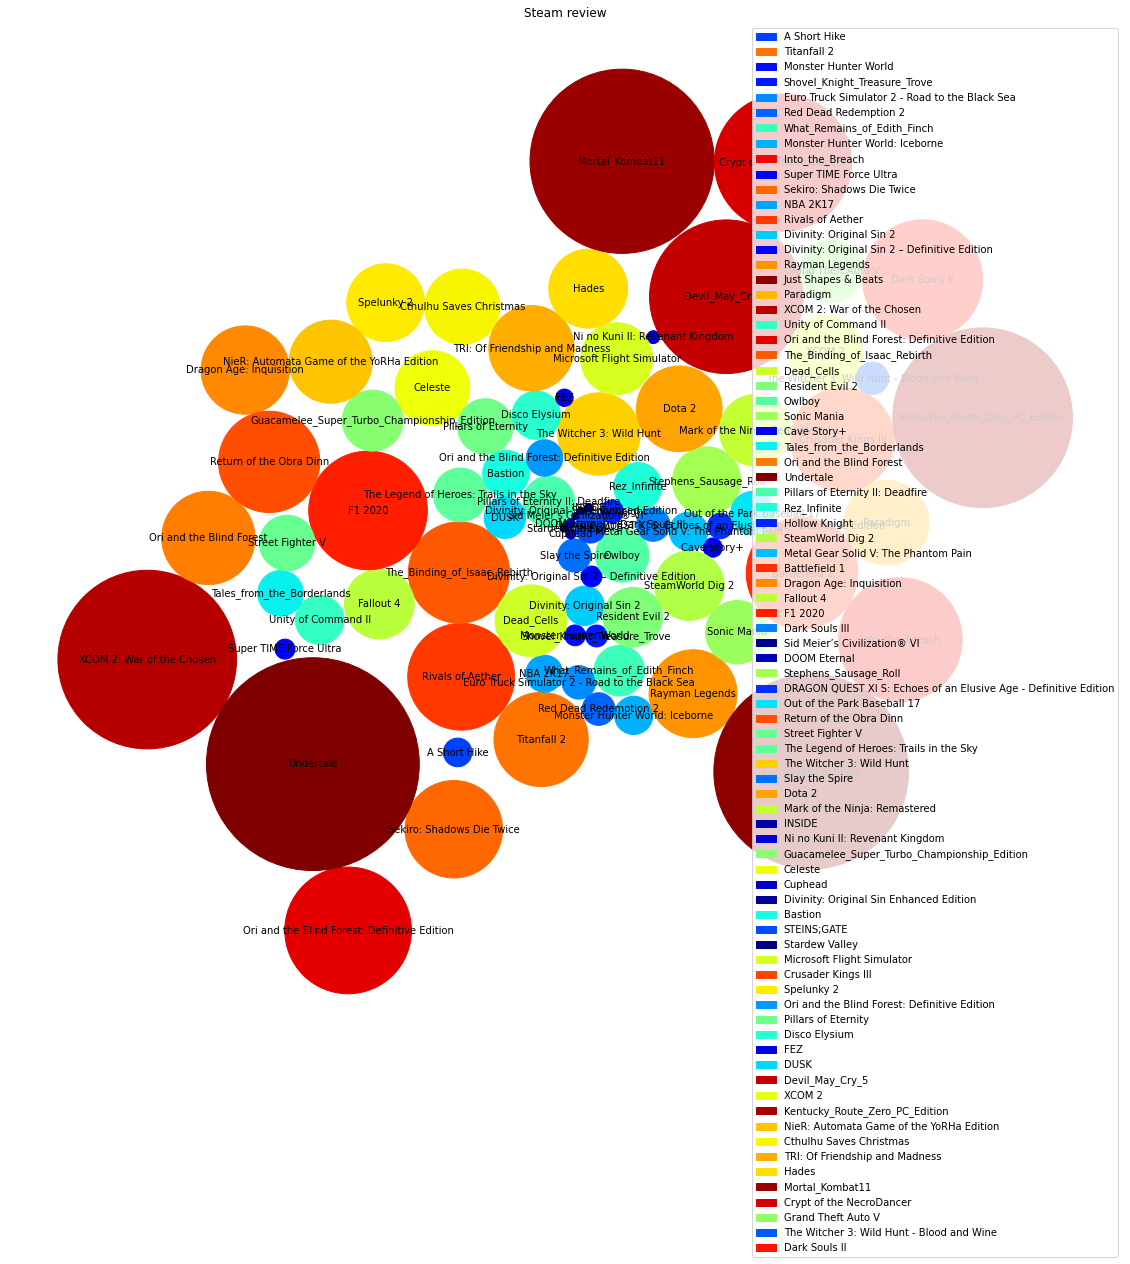

In [488]:
import matplotlib.pyplot as plt


class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')
            
def coordinate_assign(input, df):
    if input == 'TopDown': # big one is top
        pass
    if input == 'BottomUp': # big one is top
        df.sort_values(by='size',ascending=False, inplace=True)
    if input == 'Random': # big one is top
        df=df.sample(frac=1).reset_index(drop=True)

    color0 = list(np.array(df['color0'].tolist()))
    color1 = list(np.array(df['color1'].tolist()))
    color2 = list(np.array(df['color2'].tolist()))
    color3 = list(np.array(df['color3'].tolist()))

    color = []
    for i in range(len(df)):
        color.append([color0[i], color1[i], color2[i], color3[i]])

    return list(np.array(df['label'].tolist())), list(np.array(df['size'].tolist())), color 


def make_bubble_chart(label, size, cmap = plt.get_cmap('jet'), title = '', figsize = (10, 10)):

    color = cmap(np.linspace(0, 1, len(label)))

    my_dict = {"label": label, "size": size}
    df = pd.DataFrame(my_dict)
    df.sort_values(by='size',ascending=True, inplace=True)
    df['color0'] = color[:, 0]
    df['color1'] = color[:, 1]
    df['color2'] = color[:, 2]
    df['color3'] = color[:, 3]

    label, size, color = coordinate_assign('Random', df)

    browser_market_share = {
        'browsers': label,
        'market_share': size,
        'color': color
    }

    bubble_chart = BubbleChart(area=browser_market_share['market_share'],
                            bubble_spacing=0.1)

    bubble_chart.collapse()

    fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"), figsize = figsize)
    bubble_chart.plot(ax, browser_market_share['browsers'], browser_market_share['color'])
    ax.axis("off")
    ax.relim()
    ax.autoscale_view()
    ax.set_title(title)

    plt.legend(label)
    plt.show()


input_list = list(np.array(node_data['name'].tolist()))
input_size = list(np.array(node_data['total num'].tolist()))


make_bubble_chart(label = input_list, size = input_size, cmap = plt.get_cmap('jet'), title = 'Steam review', figsize = (20, 20))